In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchsummary import summary
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

### Loading the Data

In [2]:
training_data = datasets.mnist.FashionMNIST(root="data", train=True, download=True, transform=ToTensor())
test_data = datasets.mnist.FashionMNIST(root="data", train=False, download=True, transform=ToTensor())

### Model

In [3]:
# your favourite MLP model

model = ...



In [15]:
summary(model, (1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 200]         157,000
           Sigmoid-3                  [-1, 200]               0
            Linear-4                   [-1, 10]           2,010
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.61
Estimated Total Size (MB): 0.62
----------------------------------------------------------------


### Train-Eval over a given number of epochs for a given train/validation loader (4+1 fold)

In [20]:
def train_eval(nepochs, model, lr, trainloader, validloader, cost_fn):
    cost_hist = []
    cost_hist_test = []
    acc_hist = []
    acc_hist_test = []

    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
        
    for epoch in range(nepochs):

        ...
        
        print("Epoch %i: %f, %f, %f, %f"%(epoch, cost, acc, cost_test, acc_test))
        cost_hist.append(cost)
        cost_hist_test.append(cost_test)
        acc_hist.append(acc)
        acc_hist_test.append(acc_test)
    return cost_hist, cost_hist_test, acc_hist, acc_hist_test

### Split Training Data into folds

Prepare specific loaders for the 4 training folds and the 1 validation fold

Suggestions:
* Use sklearns KFold functionality for spliiting into folds.
* Use pytorchs subsamplers (torch.utils.data.SubsetRandomSampler) to construct training and validation loaders

In [19]:
# Configuration options
nfolds = 5
nepochs = 20
lr = 0.3
batchsize = 64

cost_fn = torch.nn.CrossEntropyLoss()
results = {}

...




In [21]:
for fold, (train_ids, valid_ids) in enumerate(kfold.split(training_data)):

    print(f'FOLD {fold}')
    print('--------------------------------')

    ....
    
    
    results[fold] = train_eval(nepochs, model, lr, trainloader, validloader, cost_fn) 

FOLD 0
--------------------------------
Epoch 0: 0.009533, 0.816479, 0.005067, 0.908250
Epoch 1: 0.004786, 0.911417, 0.004595, 0.913250
Epoch 2: 0.004079, 0.924083, 0.003734, 0.931750
Epoch 3: 0.003527, 0.934562, 0.003279, 0.940417
Epoch 4: 0.003100, 0.942771, 0.002905, 0.947750
Epoch 5: 0.002739, 0.949458, 0.002679, 0.949167
Epoch 6: 0.002446, 0.953958, 0.002566, 0.951500
Epoch 7: 0.002213, 0.959521, 0.002299, 0.956417
Epoch 8: 0.002010, 0.963104, 0.002167, 0.959917
Epoch 9: 0.001843, 0.965812, 0.002029, 0.962417
Epoch 10: 0.001693, 0.968854, 0.001872, 0.964167
Epoch 11: 0.001558, 0.971187, 0.001840, 0.966333
Epoch 12: 0.001443, 0.973583, 0.001840, 0.963917
Epoch 13: 0.001345, 0.976000, 0.001692, 0.968833
Epoch 14: 0.001253, 0.977563, 0.001608, 0.969500
Epoch 15: 0.001176, 0.978958, 0.001563, 0.970917
Epoch 16: 0.001100, 0.980313, 0.001515, 0.970750
Epoch 17: 0.001035, 0.982000, 0.001499, 0.971000
Epoch 18: 0.000970, 0.983042, 0.001415, 0.972167
Epoch 19: 0.000916, 0.984021, 0.001406,

### Prepare output plots

Text(0, 0.5, 'accuracy')

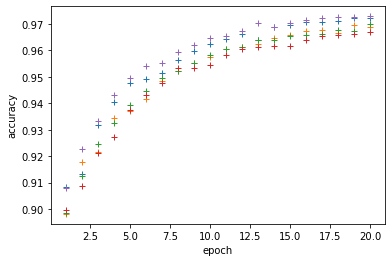

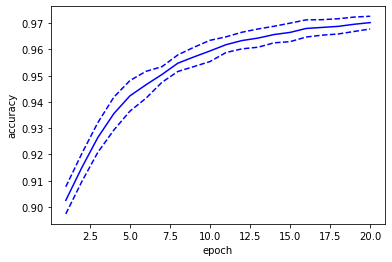

In [37]:
....